# Collaborative Filtering (CF) applied to x-wine dataset

Install `conda install -c conda-forge scikit-surprise -y`

* https://surprise.readthedocs.io/en/stable/knn_inspired.html
* https://surprise.readthedocs.io/en/stable/getting_started.html#load-from-df-example

In [46]:
import pandas as pd
import missingno as msno
import seaborn as sns


from surprise import Dataset
from surprise import Reader
from surprise import KNNBasic, KNNBaseline, BaselineOnly

import copy

## Rating Matrix

Missing values replaced with Zero / Load the data from csv

In [47]:
full_df = pd.read_csv("datasets/XWines_Test_1K_ratings.csv")

### Data Analysis

In [48]:
full_df.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RatingID,1000.0,NaN,NaN,NaN,9190598.87,6345617.780951,3211.0,3596661.25,8387677.0,14374778.25,20889646.0
UserID,1000.0,NaN,NaN,NaN,1273500.795,260411.513671,1000045.0,1099583.5,1197475.5,1356095.0,2062232.0
WineID,1000.0,NaN,NaN,NaN,144852.047,31381.997314,100062.0,113730.0,143222.0,174274.0,198580.0
Vintage,1000,37,2015,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,1000.0,NaN,NaN,NaN,3.772,0.706056,1.0,3.5,4.0,4.0,5.0
Date,1000,1000,2016-08-08 00:50:22,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

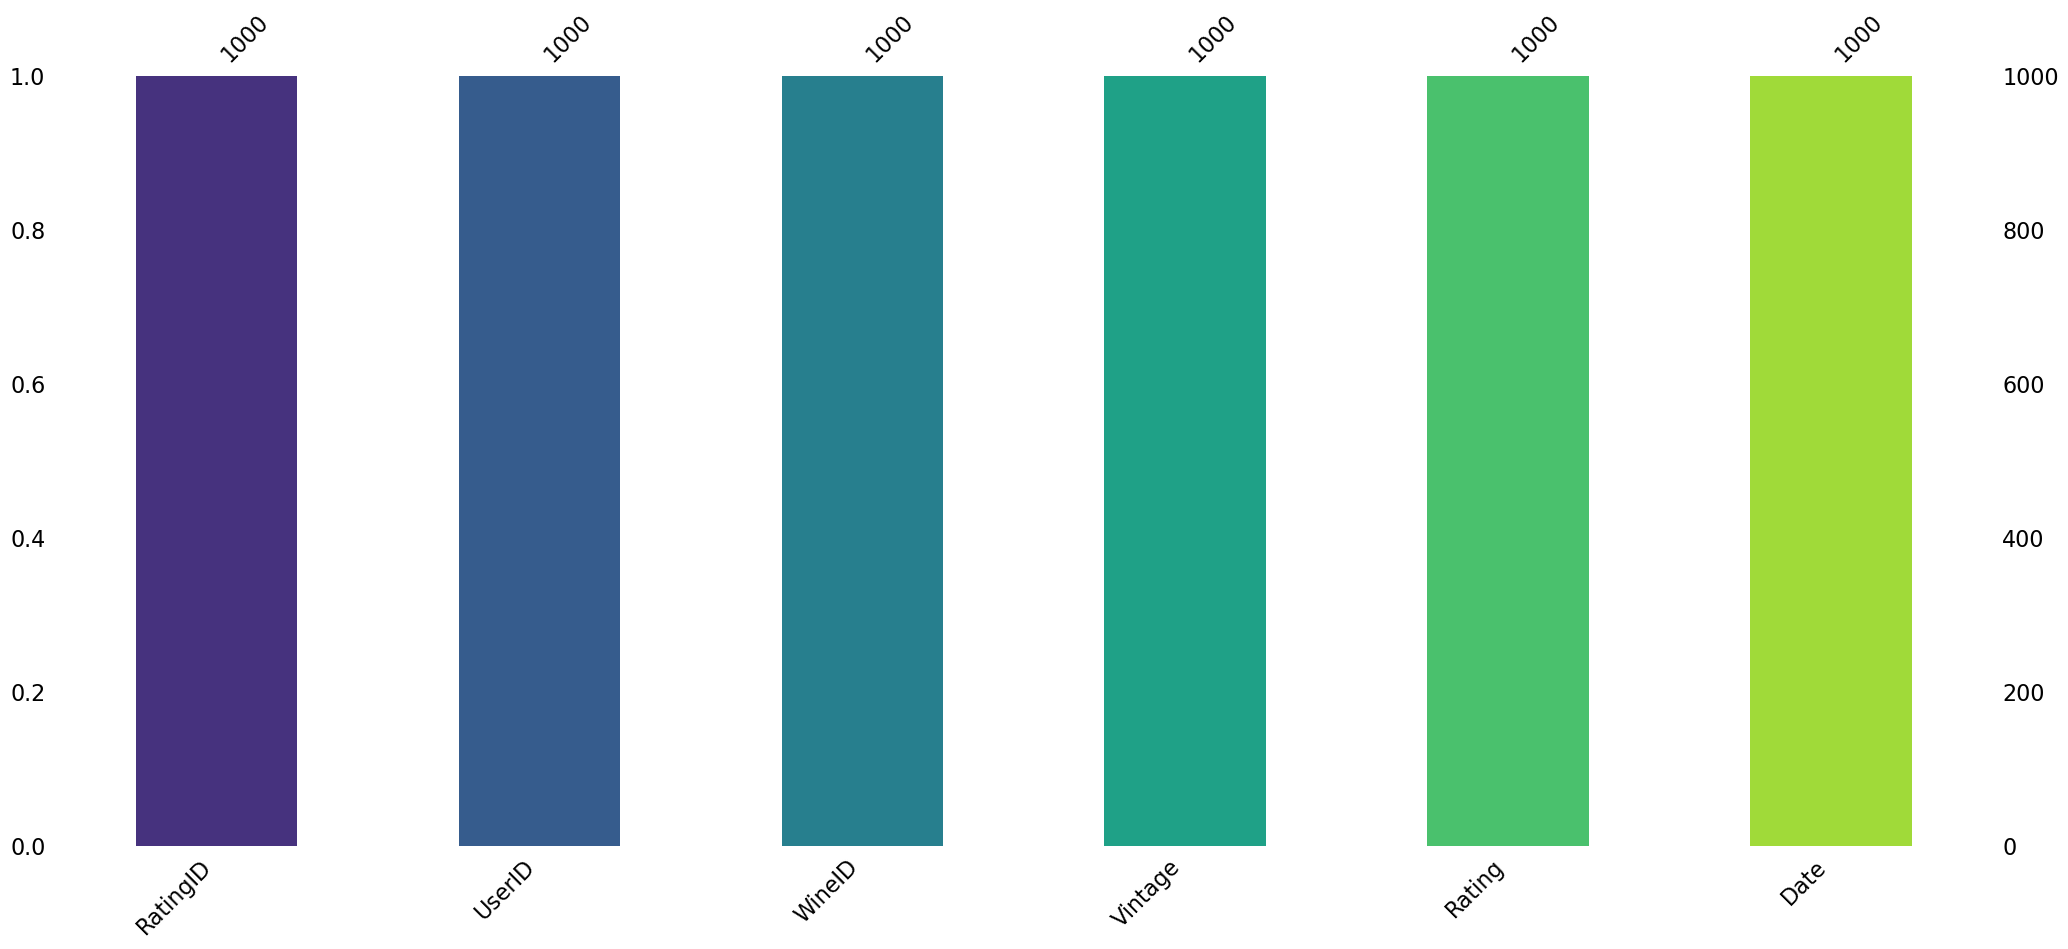

In [50]:
msno.bar(full_df,color= sns.color_palette('viridis'))

### Transform into transactional format

In [29]:
# Extract relevant columns
transactions = []

for index, row in full_df.iterrows():
    transactions.append([row["UserID"], row["WineID"], row["Rating"]])

# Print the transactions list
print(transactions)

# Convert transactions list into DataFrame
df = pd.DataFrame(transactions, columns=["userID", "WineID", "rating"])
df

[[1209683, 111478, 4.5], [1209980, 111478, 4.0], [1258705, 111478, 5.0], [1139706, 111478, 5.0], [1240747, 111478, 4.5], [1123010, 111478, 4.0], [1003868, 111478, 4.0], [1224698, 111478, 3.5], [1265698, 132977, 4.5], [1218495, 111478, 5.0], [1181964, 111478, 3.0], [1055576, 111478, 3.5], [1281978, 111478, 4.0], [1362711, 111478, 3.5], [1201703, 111478, 4.5], [1002043, 111478, 4.5], [1267664, 111478, 4.5], [1004940, 111478, 4.0], [1122909, 111478, 3.0], [1003590, 111478, 4.5], [1196127, 111478, 3.5], [1104208, 111478, 4.0], [1216278, 179386, 2.5], [1231523, 132977, 4.0], [1188640, 125678, 3.5], [1666961, 143800, 4.0], [1181964, 113730, 3.5], [1305310, 133447, 4.0], [1406880, 132977, 4.0], [1705206, 138625, 4.0], [1151047, 126285, 2.0], [1938871, 116418, 1.0], [1216861, 143800, 4.5], [2040165, 105748, 4.0], [1619285, 105748, 4.5], [1687371, 116418, 4.0], [1267880, 132977, 4.5], [1165079, 105748, 2.5], [1169012, 132977, 4.0], [1215616, 125678, 4.5], [1176849, 105748, 4.0], [1200844, 16250

,userID,WineID,rating
0,1209683,111478,4.5
1,1209980,111478,4.0
2,1258705,111478,5.0
3,1139706,111478,5.0
4,1240747,111478,4.5
...,...,...,...
995,1006657,102055,3.5
996,1160496,160271,4.0
997,1055576,102055,3.5
998,1004369,102055,3.5


### Dataset for package surprise

In [30]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userID', 'WineID', 'rating']], reader)

## Predict Ratings using Baselines

In [31]:
# Retrieve the trainset.
trainset = data.build_full_trainset()

# Build an algorithm, and train it.
algo = BaselineOnly()
algo.fit(trainset)

Estimating biases using als...


### Show Baseline Estimates

In [32]:
print('user biases', algo.bu)
print('item biases', algo.bi)

user biases [-1.68820102e-01 -3.58014995e-02  1.07193237e-03  4.30322847e-02
  1.91371759e-02 -2.43427601e-02  2.65530015e-03 -1.20786440e-01
  3.98887963e-02  6.01663733e-02 -9.30086626e-02 -2.51544919e-02
  6.01957392e-03 -1.28958245e-01  2.89163733e-02 -4.07116781e-03
  1.26445135e-02 -2.96808223e-02 -2.88240822e-02  4.28625106e-02
 -6.46523323e-02 -2.73886689e-02 -1.52583473e-01  1.79198218e-02
 -1.01716395e-01  6.84197600e-03  1.23392473e-02  8.63879632e-03
 -3.43907207e-02 -1.02280810e-01 -1.51433902e-01  3.80919760e-02
  1.20299148e-02  4.32799148e-02  3.60660977e-02  3.98887963e-02
 -8.17200852e-02  8.63879632e-03  9.78830989e-02  1.20299148e-02
  7.01060472e-02 -8.89339023e-02  5.09908420e-02  4.32799148e-02
  7.45299148e-02 -5.76839023e-02 -5.38612037e-02 -8.39340489e-03
  4.81609769e-03  3.60660977e-02  4.35892473e-02  3.80919760e-02
  4.72469366e-02 -8.53081003e-03 -3.77349672e-02  6.01663733e-02
 -2.09479075e-02 -1.12130000e-01 -5.20989856e-02  1.03020925e-02
  1.28700000e

### Fill all missing values

In [33]:
full_df_hat = copy.deepcopy(full_df)

for index, row in full_df_hat.iterrows():
    for column in full_df_hat.columns:
        if pd.isnull(row[column]):
            pred = algo.predict(row['UserID'], row['WineID'], verbose=True)  # Adjust as needed
            full_df_hat.at[index, column] = pred.est

# Now full_df_hat contains the predictions for missing values

In [34]:
full_df_hat, full_df

(     RatingID   UserID  WineID Vintage  Rating                 Date
 0        3211  1209683  111478    1959     4.5  2016-08-08 00:50:22
 1       27878  1209980  111478    1975     4.0  2018-08-12 17:09:39
 2       31227  1258705  111478    1975     5.0  2014-11-16 19:52:38
 3       41946  1139706  111478    1979     5.0  2014-12-22 02:30:15
 4       61700  1240747  111478    1982     4.5  2019-10-21 02:01:10
 ..        ...      ...     ...     ...     ...                  ...
 995  20871491  1006657  102055    N.V.     3.5  2019-12-29 13:38:44
 996  20871989  1160496  160271    N.V.     4.0  2015-01-07 12:39:36
 997  20875704  1055576  102055    N.V.     3.5  2020-11-03 19:14:49
 998  20885463  1004369  102055    N.V.     3.5  2020-08-29 01:26:13
 999  20889646  1243678  102055    N.V.     3.5  2019-09-04 18:15:31
 
 [1000 rows x 6 columns],
      RatingID   UserID  WineID Vintage  Rating                 Date
 0        3211  1209683  111478    1959     4.5  2016-08-08 00:50:22
 1    

## Predict Ratings using kNN

In [35]:
# Retrieve the trainset.
trainset = data.build_full_trainset()

# Build an algorithm, and train it.
algo = KNNBasic()
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


### Examples

In [36]:
userID = 1209683
wineID = 111478

# get a prediction for specific users and items.
pred = algo.predict(userID, wineID, verbose=True)

user: 1209683    item: 111478     r_ui = None   est = 4.29   {'actual_k': 22, 'was_impossible': False}


In [37]:
uid = 1209683
iid = 179386

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose=True)

user: 1209683    item: 179386     r_ui = None   est = 3.53   {'actual_k': 4, 'was_impossible': False}


## Predict Ratings using kNN and Baseline

In [38]:
# Build an algorithm, and train it.
algo = KNNBaseline(k=1)
algo.fit(trainset)
#predictions = algo.test(trainset)
#rmse = accuracy.rmse(predictions, verbose=True)

full_df_hat = copy.deepcopy(full_df)

for index, row in full_df_hat.iterrows():
    for column in full_df_hat.columns:
        if pd.isnull(row[column]):
            pred = algo.predict(row['UserID'], row['WineID'], verbose=True)  # Adjust as needed
            full_df_hat.at[index, column] = pred.est

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [39]:
full_df_hat, full_df

(     RatingID   UserID  WineID Vintage  Rating                 Date
 0        3211  1209683  111478    1959     4.5  2016-08-08 00:50:22
 1       27878  1209980  111478    1975     4.0  2018-08-12 17:09:39
 2       31227  1258705  111478    1975     5.0  2014-11-16 19:52:38
 3       41946  1139706  111478    1979     5.0  2014-12-22 02:30:15
 4       61700  1240747  111478    1982     4.5  2019-10-21 02:01:10
 ..        ...      ...     ...     ...     ...                  ...
 995  20871491  1006657  102055    N.V.     3.5  2019-12-29 13:38:44
 996  20871989  1160496  160271    N.V.     4.0  2015-01-07 12:39:36
 997  20875704  1055576  102055    N.V.     3.5  2020-11-03 19:14:49
 998  20885463  1004369  102055    N.V.     3.5  2020-08-29 01:26:13
 999  20889646  1243678  102055    N.V.     3.5  2019-09-04 18:15:31
 
 [1000 rows x 6 columns],
      RatingID   UserID  WineID Vintage  Rating                 Date
 0        3211  1209683  111478    1959     4.5  2016-08-08 00:50:22
 1    

## Try some options

In [40]:
sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
algo = KNNBasic(sim_options=sim_options, k=2)

algo.fit(trainset)

full_df_hat = copy.deepcopy(full_df)

for index, row in full_df_hat.iterrows():
    for column in full_df_hat.columns:
        if pd.isnull(row[column]):
            pred = algo.predict(row['UserID'], row['WineID'], verbose=False)  # Adjust as needed
            print("User", row['UserID'], "Wine", row['WineID'], "=", pred.est)
            full_df_hat.at[index, column] = pred.est

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [41]:
full_df_hat, full_df

(     RatingID   UserID  WineID Vintage  Rating                 Date
 0        3211  1209683  111478    1959     4.5  2016-08-08 00:50:22
 1       27878  1209980  111478    1975     4.0  2018-08-12 17:09:39
 2       31227  1258705  111478    1975     5.0  2014-11-16 19:52:38
 3       41946  1139706  111478    1979     5.0  2014-12-22 02:30:15
 4       61700  1240747  111478    1982     4.5  2019-10-21 02:01:10
 ..        ...      ...     ...     ...     ...                  ...
 995  20871491  1006657  102055    N.V.     3.5  2019-12-29 13:38:44
 996  20871989  1160496  160271    N.V.     4.0  2015-01-07 12:39:36
 997  20875704  1055576  102055    N.V.     3.5  2020-11-03 19:14:49
 998  20885463  1004369  102055    N.V.     3.5  2020-08-29 01:26:13
 999  20889646  1243678  102055    N.V.     3.5  2019-09-04 18:15:31
 
 [1000 rows x 6 columns],
      RatingID   UserID  WineID Vintage  Rating                 Date
 0        3211  1209683  111478    1959     4.5  2016-08-08 00:50:22
 1    

### Examples

In [42]:
userID = 1209683
wineID = 111478

# get a prediction for specific users and items.
pred = algo.predict(userID, wineID, verbose=True)

user: 1209683    item: 111478     r_ui = None   est = 3.75   {'actual_k': 2, 'was_impossible': False}


In [43]:
uid = 1209683
iid = 179386

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose=True)

user: 1209683    item: 179386     r_ui = None   est = 3.75   {'actual_k': 2, 'was_impossible': False}
